# 탐색적 분석 시각화 툴에 대한 소개들

```
타겟 변수의 클래스 별 빈도를 시각화하여, 불균형이 있는지 확인해봅시다.
각 피처의 분포를 확인하여, 데이터의 전반적인 형태를 이해해봅시다.
각 피처의 타겟 클래스 별 빈도를 시각화하여, 피처와 타겟 간의 관계를 살펴봅시다.
각 피처의 분포와 이상치를 탐색해봅시다.
피처 쌍과 타겟과의 연관관계를 시각화하여, 피처 간의 상호 작용을 이해해봅시다.
```

1. Target 을 class 별로 빈도수와 비율 시각화

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#  target ratio 계산
target_ratio = round(train['Outcome'].value_counts(normalize=True) * 100, 2)

plt.figure(figsize=(6,4))
ax = sns.countplot(x='Outcome', data=train)

# Annotate the bars with the percentage values
for i, patch in enumerate(ax.patches):
    height = patch.get_height()
    ax.text(patch.get_x() + patch.get_width() / 2.,
            height,
            '{:.2f}%'.format(target_ratio[i]),
            ha="center")

plt.show()

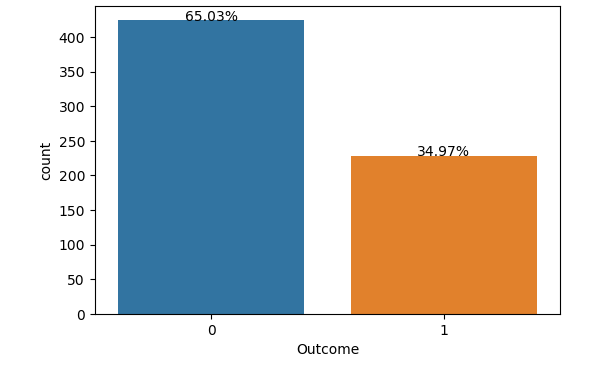

2. feature들의 변수 확인

In [ ]:
features = train.columns[1:-1 ]

plt.figure(figsize=(10,6))

for idx, feature in enumerate(features):
  ax1 = plt.subplot(3,3,idx+1)
  plt.title(feature)
  plt.tight_layout()
  sns.histplot(x=feature, data = train,kde=True)

plt.show()

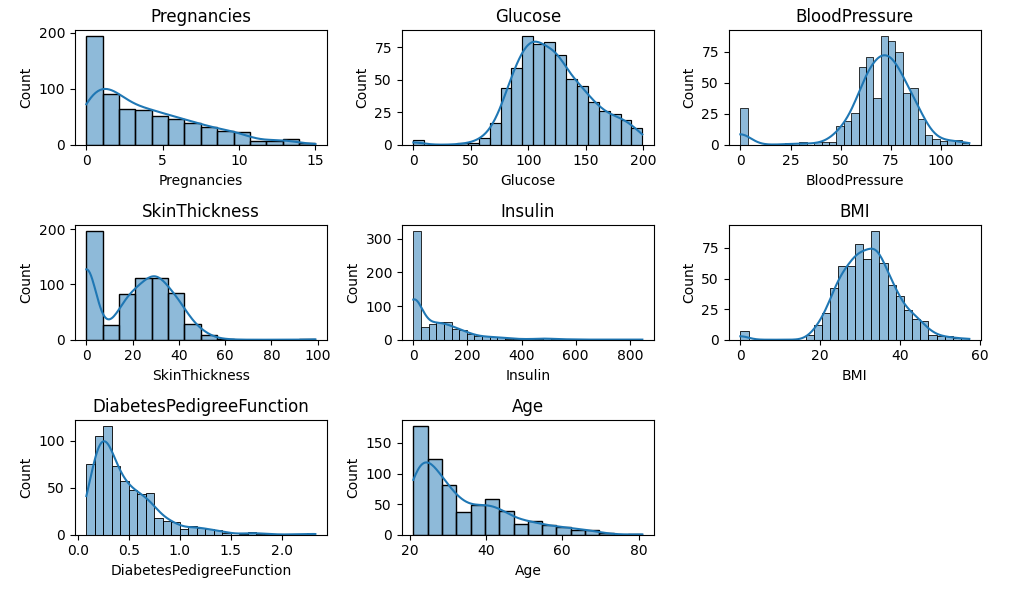

이거 툴 되게 좋네

3. feature들의 target class별 빈도수 시각화

In [ ]:
selected_feature = 'BMI'  # 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'

plt.figure(figsize=(8,4))

# 사분위 수 계산
q1 = np.percentile(train[selected_feature], 25)
q2 = np.percentile(train[selected_feature], 50)
q3 = np.percentile(train[selected_feature], 75)
q4 = np.percentile(train[selected_feature], 100)

q_lst = [ 0, q1, q2, q3, q4]

# target class 1의 갯수 대비 target class 0의 갯수의 비율 구하기
num_class0 = len(train [ train['Outcome'] == 0 ])
num_class1 = len(train [ train['Outcome'] == 1 ])

ratio_class1_class0 = num_class0/ num_class1

# 히스토그램 그리기
plt.figure(figsize=(8, 4))
h0_ax1 = sns.histplot(data=train[train['Outcome'] == 0], x=selected_feature, bins = q_lst,  alpha=0.3,  label='Outcome = 0')
h1_ax1 = sns.histplot(data=train[train['Outcome'] == 1], x=selected_feature, bins = q_lst,  alpha=0.3,  label='Outcome = 1')

# target 변수의 class가 1일 때의 각 bin의 높이(개수)와 경계값을 얻어옵니다
h1_heights, h1_edges = np.histogram(train[train['Outcome'] == 1][selected_feature], bins=q_lst)

# target class 1의 갯수 대비 target class 0의 갯수의 비율과 일치하는 각 구간의 수평선을 그린다
for i in range(len(h1_heights)):
    plt.hlines(y=h1_heights[i] * ratio_class1_class0 , xmin=h1_edges[i], xmax=h1_edges[i+1], linestyles='solid', colors='red', alpha=0.5)

plt.gca().set_title(f"{selected_feature} (quantile based)")

plt.tight_layout()
plt.legend()
plt.show()

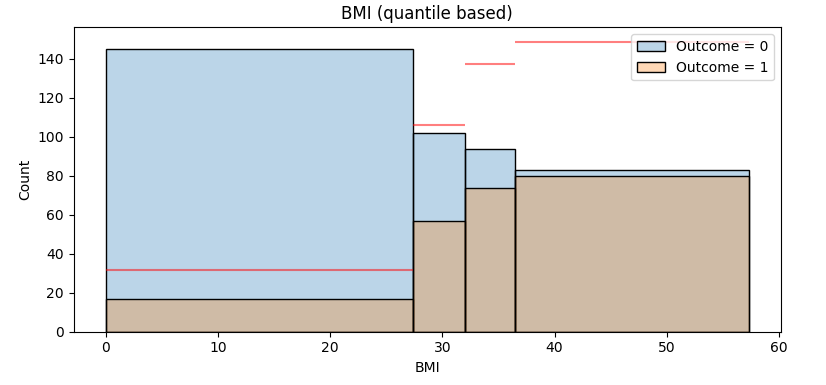

빨간선이 기준치선

4. boxplot 으로 찾기

In [ ]:
features = train.columns[1:-1 ]

plt.figure(figsize=(10,6))

for idx, feature in enumerate(features):
  ax1 = plt.subplot(3,3,idx+1)
  plt.title(feature)
  plt.tight_layout()
  sns.boxplot(x='Outcome', y=feature, data = train)

plt.show()

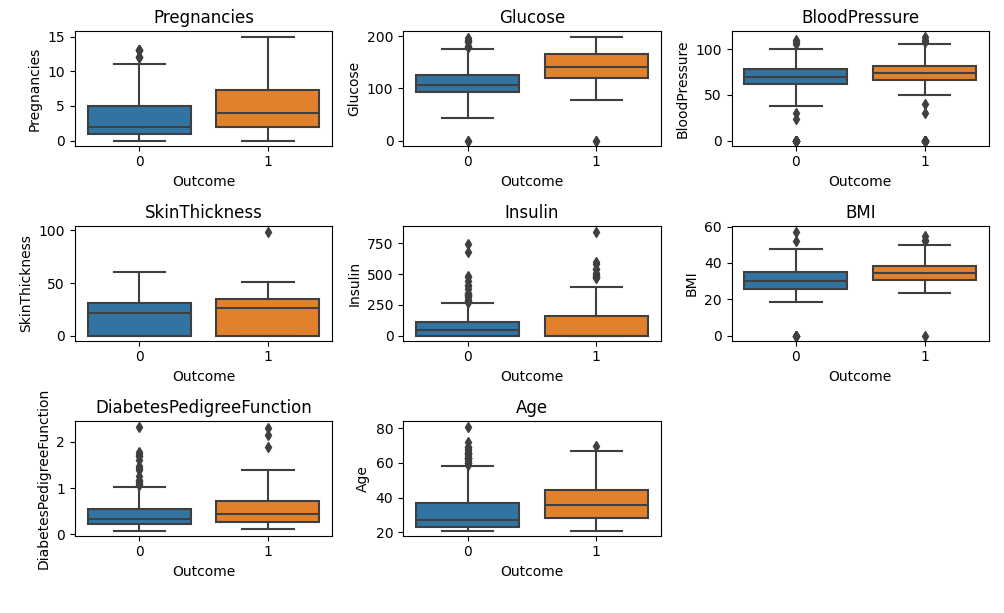

5. feature 변수쌍과 target과의 연관관계 시각화

In [ ]:
plt.figure(figsize=(3,2))

#features_to_analyze = train.columns[1:]
features_to_analyze = ['Insulin', 'SkinThickness', 'Glucose', 'BMI', 'Outcome']
sns.pairplot(train[features_to_analyze], hue='Outcome')

plt.show()

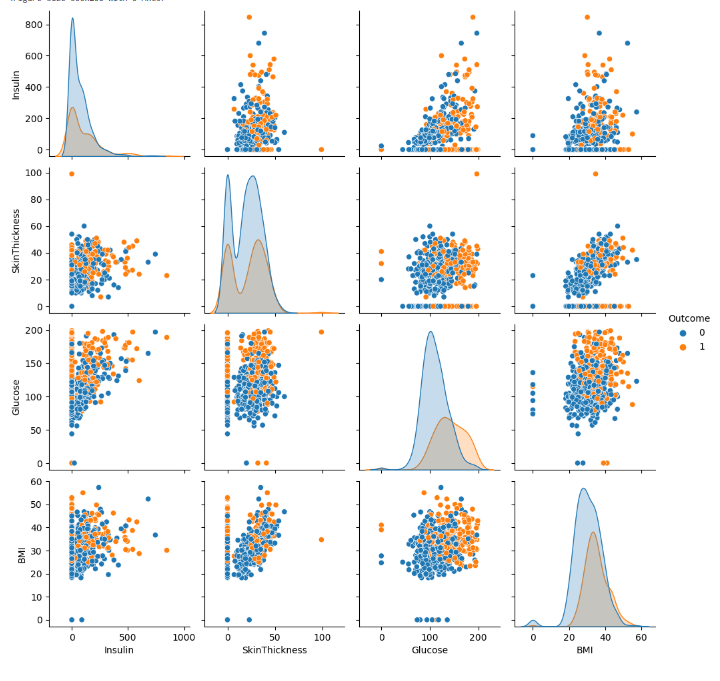